<a href="https://colab.research.google.com/github/LissaUrbano/Churn_predition/blob/main/Churn_predition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação e tratamento dos dados

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Importação e Visualização dos Dados
data = pd.read_csv('/content/drive/MyDrive/FIAP - MBA BI & BA/Solution Sprint 5/Churn Analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Verificando se há valores duplicados
data.duplicated().sum()

0

In [5]:
# Remover variáveis não explicativas 
data.drop(['customerID'], axis=1, inplace=True)

#SeniorCitizen está na forma 'int', que pode ser alterada para categórica.
data['SeniorCitizen'].replace(1, 'Yes', inplace=True)
data['SeniorCitizen'].replace(0, 'No', inplace=True)

# Converter vazios 
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data.isna().sum() 

# Converte tipo string em numérico
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

# Limpeza de dados
data.replace('No phone service', 'No', inplace=True) 
data.replace('No internet service', 'No', inplace=True) 

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Verificando se há valores ausentes
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Exclui dados vazios
data.dropna(inplace=True)

data.shape

(7032, 20)

# Exploração dos dados

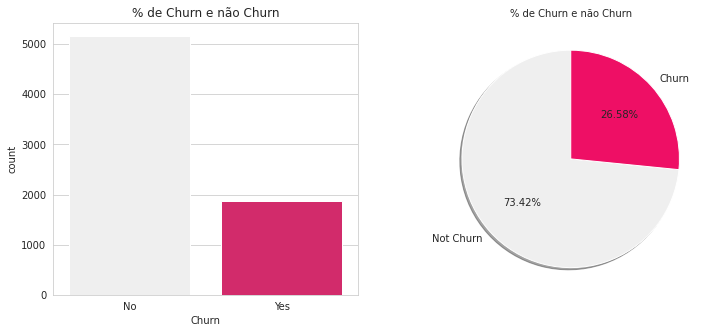

In [8]:
import matplotlib
#Churn

sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(['#efefef', '#ee0f65']))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='Churn',data=data)
plt.title("% de Churn e não Churn")

plt.subplot(1,2,2)
sizes = data['Churn'].value_counts(sort = True)
plt.pie(sizes,labels=["Not Churn","Churn"],autopct='%1.2f%%', shadow=True, startangle=90)
plt.title('% de Churn e não Churn',size = 10)

plt.show()

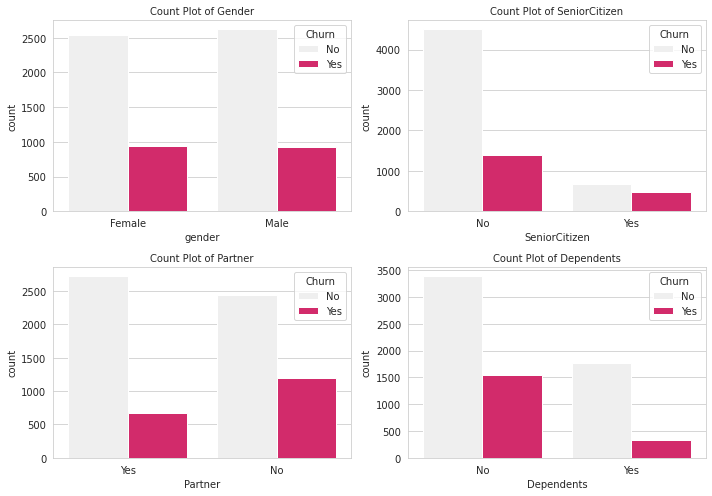

In [9]:
#Demografica
fig, ax = plt.subplots(2, 2, figsize = (10, 7))
plt.title("Visualization")

sns.countplot('gender', hue = 'Churn', data = data, ax = ax[0][0])
sns.countplot('SeniorCitizen', hue = 'Churn', data = data, ax = ax[0][1])
sns.countplot('Partner', hue = 'Churn', data = data, ax = ax[1][0])
sns.countplot('Dependents', hue = 'Churn', data = data, ax = ax[1][1])

ax[0][0].set_title('Count Plot of Gender',fontsize=10)
ax[0][1].set_title('Count Plot of SeniorCitizen',fontsize=10)
ax[1][0].set_title('Count Plot of Partner',fontsize=10)
ax[1][1].set_title('Count Plot of Dependents',fontsize=10)

plt.tight_layout()
plt.show()

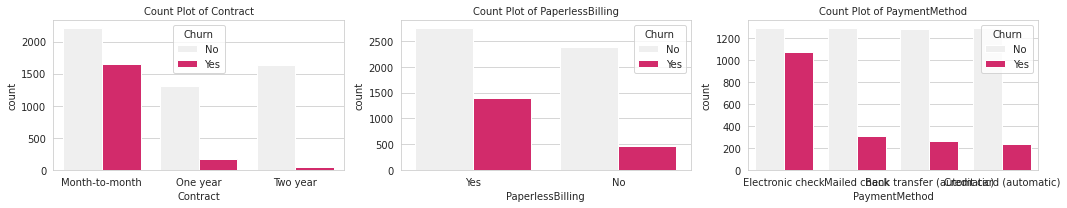

In [10]:
fig, ax = plt.subplots(1, 3, figsize = (15, 3))

sns.countplot('Contract', hue = 'Churn', data = data, ax = ax[0])
sns.countplot('PaperlessBilling', hue = 'Churn', data = data, ax = ax[1])
sns.countplot('PaymentMethod', hue = 'Churn', data = data, ax = ax[2])

ax[0].set_title('Count Plot of Contract',fontsize=10)
ax[1].set_title('Count Plot of PaperlessBilling',fontsize=10)
ax[2].set_title('Count Plot of PaymentMethod',fontsize=10)
plt.tight_layout()
plt.show()

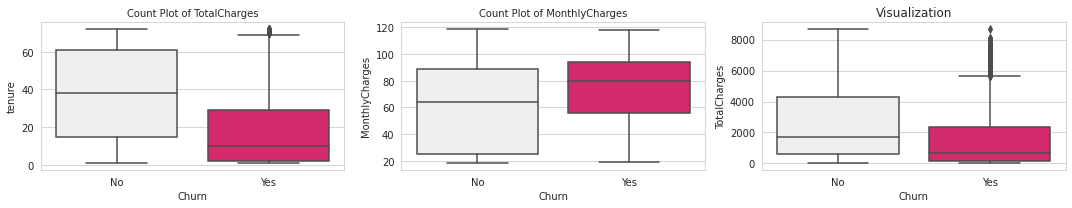

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (15, 3))
plt.title("Visualization")

# Analise exploratória Churn X Tempo do contrato 
sns.boxplot('Churn', 'tenure', data=data, ax = ax[0])
#obs: a mediana(10 meses) do tempo de constrato é menor para os clientes de sairam  

# Analise exploratória Churn X Valor mensal da conta 
sns.boxplot('Churn', 'MonthlyCharges', data=data, ax = ax[1])
#obs: a mediana(80) do valor mensal é maior para os clientes de sairam  

# Analise exploratória Churn X Valor total do contrato
sns.boxplot('Churn', 'TotalCharges', data=data, ax = ax[2])
#obs: o valor total do contrato é menor para os clientes de sairam
#obs: isso se deve ao baixo numero de meses do contrato mesmo o valor mensal sendo maior  

ax[0].set_title('Count Plot of Tenure',fontsize=10)
ax[1].set_title('Count Plot of MonthlyCharges',fontsize=10)
ax[0].set_title('Count Plot of TotalCharges',fontsize=10)

plt.tight_layout()
plt.show()

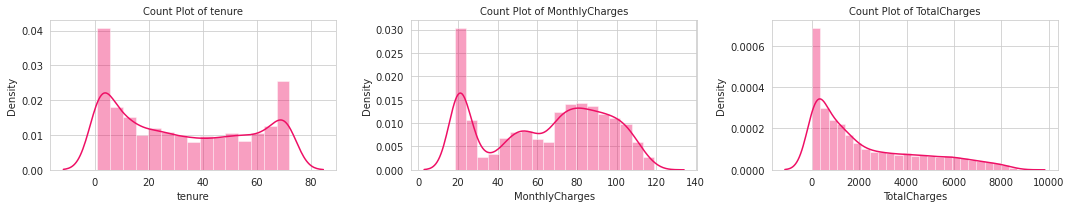

In [12]:
sns.set_palette(sns.color_palette(['#ee0f65']))

fig, ax = plt.subplots(1, 3, figsize=(15,3))

sns.distplot(data['tenure'], ax=ax[0])
sns.distplot(data['MonthlyCharges'], ax=ax[1])
sns.distplot(data['TotalCharges'], ax=ax[2]) 

ax[0].set_title('Count Plot of tenure',fontsize=10)
ax[1].set_title('Count Plot of MonthlyCharges',fontsize=10)
ax[2].set_title('Count Plot of TotalCharges',fontsize=10)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Tenure by churn')

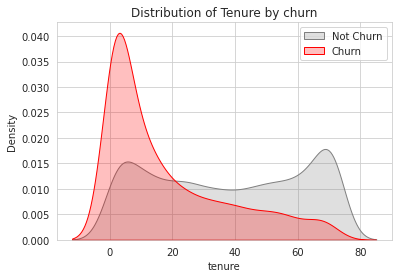

In [13]:
ax = sns.kdeplot(data.tenure[(data["Churn"] == 'No') ], color="Grey", shade = True)
ax = sns.kdeplot(data.tenure[(data["Churn"] == 'Yes') ], ax =ax, color="Red", shade= True)

ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('tenure')
ax.set_title('Distribution of Tenure by churn')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

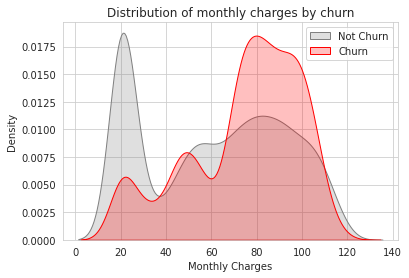

In [14]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ], color="Grey", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, color="Red", shade= True)

ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of TotalCharges by churn')

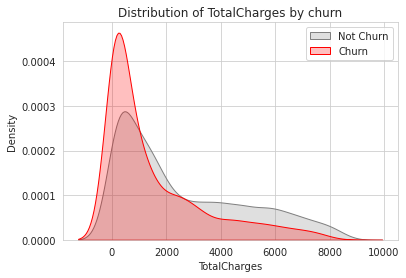

In [15]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ], color="Grey", shade = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ], ax =ax, color="Red", shade= True)

ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('TotalCharges')
ax.set_title('Distribution of TotalCharges by churn')

In [16]:
#Analise de correlaçao
corr = data.corr()
corr.style.background_gradient(cmap='Reds')
#obs: Total Charges tem vorreção positiva com MonthlyCharges e tenure.

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


In [17]:
# Criar variaveis Dummies (criar novas variaveis, uma para cada possibilidade 0/1) 
data['Churn'].replace('Yes', 1, inplace=True)
data['Churn'].replace('No', 0, inplace=True)

data_dummie = pd.get_dummies(data)

corr = data_dummie.corr()
corr.style.background_gradient(cmap='Reds')

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.015683,0.015683,-0.381912,0.381912,-0.163386,0.163386,-0.007877,0.007877,-0.332399,0.332399,0.013786,0.017930,-0.037529,-0.328297,0.328297,-0.361138,0.361138,-0.361520,0.361520,-0.325288,0.325288,-0.280264,0.280264,-0.285402,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.219874,0.219874,-0.097825,0.097825,0.112343,-0.112343,-0.248033,0.248033,-0.490912,0.490912,-0.161368,0.787195,-0.763191,-0.296447,0.296447,-0.441529,0.441529,-0.482607,0.482607,-0.338301,0.338301,-0.629668,0.629668,-0.627235,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.102411,0.102411,-0.319072,0.319072,-0.064653,0.064653,-0.113008,0.113008,-0.469042,0.469042,-0.052190,0.360769,-0.374878,-0.412619,0.412619,-0.510100,0.510100,-0.522881,0.522881,-0.432868,0.432868,-0.515709,0.515709,-0.519867,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,-0.150541,0.150541,0.149982,-0.149982,0.163128,-0.163128,-0.011691,0.011691,-0.040033,0.040033,-0.124141,0.307463,-0.227578,0.171270,-0.171270,0.082307,-0.082307,0.066193,-0.066193,0.164716,-0.164716,-0.063254,0.063254,-0.060860,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001819,0.001819,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.008883,0.008883,-0.007584,0.011189,-0.004745,-0.016328,0.016328,-0.013093,0.013093,-0.000807,0.000807,-0.008507,0.008507,-0.007124,0.007124,-0.010105,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001819,-0.001819,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.008883,-0.008883,0.007584,-0.011189,0.004745,0.016328,-0.016328,0.013093,-0.013093,0.000807,-0.000807,0.008507,-0.008507,0.007124,-0.007124,0.010105,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
SeniorCitizen_No,-0.015683,-0.219874,-0.102411,-0.150541,-0.001819,0.001819,1.000000,-1.000000,0.016957,-0.016957,-0.210550,0.210550,0.008392,-0.008392,0.142996,-0.142996,0.108276,-0.254923,0.182519,-0.038576,0.038576,0.066663,-0.066663,0.059514,-0.059514,-0.060577,0.060577,0.105445,-0.105445,0.119842,-0.119842,-0.137752,0.046491,0.116205,0.156258,-0.156258,0.016235,0.024359,-0.171322,0.152987
SeniorCitizen_Yes,0.015683,0.219874,0.102411,0.150541,0.001819,-0.001819,-1.000000,1.000000,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.142996,0.142996,-0.108276,0.254923,-0.182519,0.038576,-0.038576,-0.066663,0.066663,-0.059514,0.059514,0.060577,-0.060577,-0.105445,0.105445,-0.119842,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
Partner_No,-0.381912,-0.097825,-0.319072,0.149982,-0.001379,0.001379,0.016957,-0.016957,1.000000,-1.000000,0.452269,-0.4522

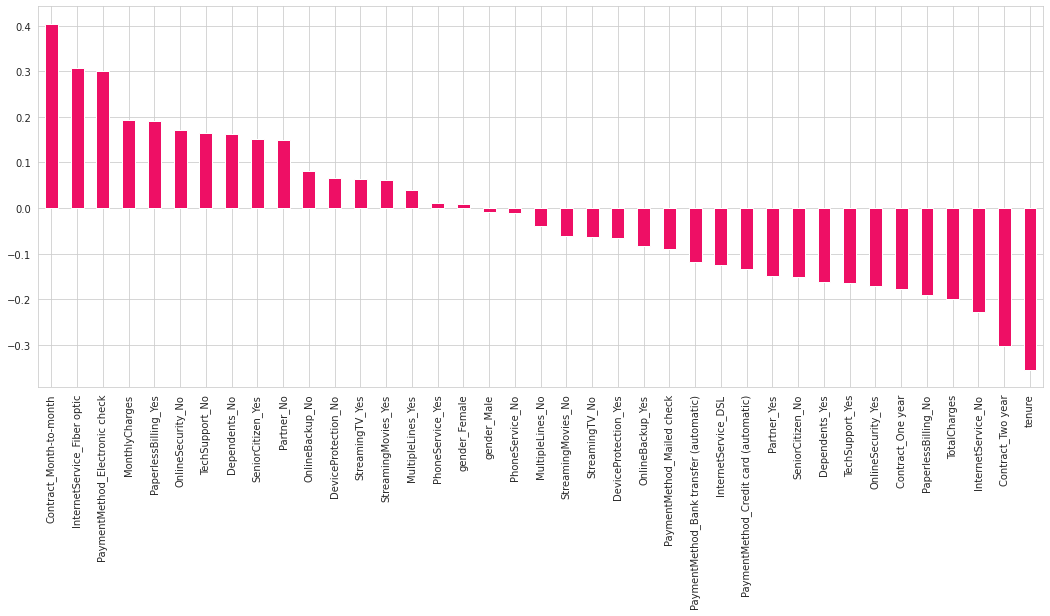

In [18]:
sns.set_palette(sns.color_palette(['#ee0f65']))

#Correlação de "Churn" com as outras variaveis:
plt.figure(figsize=(18,7))
corr = data_dummie.corr()
corr['Churn'].sort_values(ascending = False).drop('Churn').plot(kind='bar')

sns.set_palette(sns.color_palette(['#efefef', '#ee0f65']))

In [19]:
corr['Churn'].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
TotalCharges                              -0.199484
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
SeniorCitizen_No                          -0.150541
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtection_Yes                      -0.066193
StreamingTV_No                            -0.063254
StreamingMovies_No                        -0.060860
MultipleLine

# Predictive Models

Preparação

In [20]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [21]:
#Normalizacaoo
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['tenure'] = scaler.fit_transform(data_dummie['tenure'].values.reshape(-1, 1))
data['MonthlyCharges'] = scaler.fit_transform(data_dummie['MonthlyCharges'].values.reshape(-1, 1))
data['TotalCharges'] = scaler.fit_transform(data_dummie['TotalCharges'].values.reshape(-1, 1))

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,0.000000,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,0
1,Male,No,No,No,0.464789,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,0
2,Male,No,No,No,0.014085,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,1
3,Male,No,No,No,0.619718,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,0
4,Female,No,No,No,0.014085,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,1


In [61]:
#Criação das dummies
data_dummie = pd.get_dummies(data)
data_dummie.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.464789,0.385075,0.215867,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0.014085,0.354229,0.010310,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.619718,0.239303,0.210241,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0.014085,0.521891,0.015330,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [45]:
from sklearn.model_selection import train_test_split

X = data_dummie.drop("Churn", axis=1) 

#Target
Y = data_dummie['Churn'].values 

#Base de teste e treino
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=478)

X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0.464789,0.385075,0.215867,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0.014085,0.354229,0.010310,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0.619718,0.239303,0.210241,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0.014085,0.521891,0.015330,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


##Regressão logistica
(Regressão logistica é um algoritmo de aprendisagem supervisionada, usado para analise preditiva quando se tem dados históricos, tendo como resposta uma classificação, que no nosso caso é se o cliente vai evadir ou não)

In [46]:
from sklearn.linear_model import LogisticRegression

# Criando a maquina preditiva
model = LogisticRegression()

# Modelo de Treino 
model.fit(X_train, Y_train)

# Aplicando dados de teste
predict_logistic_regression = model.predict(X_test) 

# Dataframe 
actual_vs_predict = pd.DataFrame({'Actual': Y_test.flatten(), 'Prediction': predict_logistic_regression.flatten()})
print(actual_vs_predict.sample(10))

      Actual  Prediction
1025       0           1
1371       0           0
685        0           0
1960       0           0
1219       0           0
544        1           0
1585       0           0
202        0           0
1918       0           0
704        1           1


Avaliação da Máquina Preditiva (Regressão Logistica)

In [47]:
from sklearn import metrics
#Acuracia do modelo
print (metrics.accuracy_score(Y_test, predict_logistic_regression))

0.8180094786729858


ROC AUC: 86.24 %


Text(0, 0.5, 'True Positive Rate')

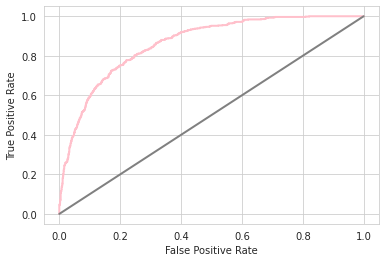

In [60]:
from sklearn.metrics import roc_auc_score, roc_curve
# Avaliação do modelo de Regressão Logistica
# Utilizando a curva ROC
y_probs_logistic_regression = model.predict_proba(X_test)[:,1]
print('ROC AUC: %.2f' % (roc_auc_score(Y_test,y_probs_logistic_regression)*100), '%')

# ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_probs_logistic_regression)
plt.plot(fpr, tpr, lw=2, color='pink')
plt.plot([0,1], [0,1], lw=2, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

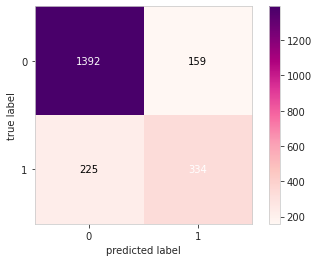

In [51]:
#Matrix de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predict_logistic_regression)
cm

#Graph
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix (conf_mat=cm, cmap='RdPu', colorbar=True)
plt.show()

##Random Forest Classifier


In [20]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=478)

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Criando a maquina preditiva
random_forest_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, random_state=100, n_jobs=-1)

# Modelo de Treino 
random_forest_model.fit(X_train, Y_train)

# Aplicando dados de teste
predict_random_forest = random_forest_model.predict(X_test) 

# Dataframe 
actual_vs_predict = pd.DataFrame({'Actual': Y_test.flatten(), 'Prediction': predict_random_forest.flatten()})
print(actual_vs_predict.sample(10))

      Actual  Prediction
952        0           0
1718       0           0
1163       0           0
1194       0           0
350        1           1
553        0           0
1789       0           0
1107       0           0
1090       0           0
1184       1           1


Avaliação da Máquina Preditiva (Regressão Logistica)

In [58]:
from sklearn import metrics
# Acuracia do modelo
print (metrics.accuracy_score(Y_test, predict_random_forest))

0.8127962085308057


ROC AUC: 84.92 %


Text(0, 0.5, 'True Positive Rate')

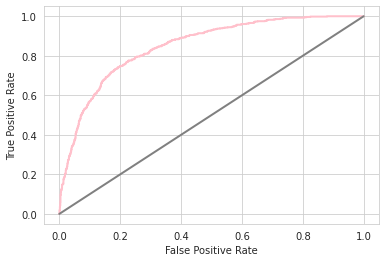

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve
# Avaliação do modelo de Random Forest
# Utilizando a curva ROC
y_probs_random_forest = random_forest_model.predict_proba(X_test)[:,1]
print('ROC AUC: %.2f' % (roc_auc_score(Y_test,y_probs_random_forest)*100), '%')

# ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_probs_random_forest)
plt.plot(fpr, tpr, lw=2, color='pink')
plt.plot([0,1], [0,1], lw=2, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

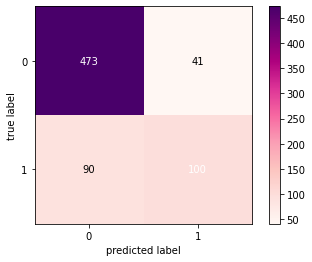

In [42]:
# Matrix Confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predict_random_forest)
cm

#Graph
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix (conf_mat=cm, cmap='RdPu', colorbar=True)
plt.show()